In [1]:
!pip install cellxgene-census pandas  plotly

In [3]:
import cellxgene_census
import pandas as pd
import plotly.express as px # For potential visualization

In [5]:

CENSUS_VERSION = "2025-01-30" # Use the current stable version you are accessing


try:
    census = cellxgene_census.open_soma(census_version=CENSUS_VERSION)
    print(f"Successfully opened census version: {CENSUS_VERSION}")

    # The rest of your code will go inside this block
    # ...

except Exception as e:
    print(f"An error occurred while opening the census: {e}")

# The census is automatically closed when exiting the 'with' block
print("Census operations complete.")

Successfully opened census version: 2025-01-30
Census operations complete.


In [7]:
# Define the filtering criteria
disease_filter = "disease == 'invasive lobular breast carcinoma'"
assay_filter = "assay == '10x gene expression flex'"
primary_data_filter = "is_primary_data == True" # Boolean True in filter is written as True

# Combine the filters using 'and'
value_filter_string = f"{disease_filter} and {assay_filter} and {primary_data_filter}"

print(f"Using filter: {value_filter_string}")

Using filter: disease == 'invasive lobular breast carcinoma' and assay == '10x gene expression flex' and is_primary_data == True


In [9]:

column_names_list = ["cell_type", "disease", "assay", "is_primary_data"]

print("Querying cell metadata...")
cell_metadata = cellxgene_census.get_obs(
    census=census,
    organism="Homo sapiens",
    value_filter=value_filter_string,
    column_names=column_names_list,
)

print(f"Retrieved {len(cell_metadata)} cells matching the criteria.")


Querying cell metadata...
Retrieved 3937 cells matching the criteria.



Full Cell Type Distribution for the specified criteria:
cell_type
malignant cell                                 944
plasma cell                                    714
fibroblast of lung                             536
cytotoxic T cell                               434
smooth muscle cell                             282
                                              ... 
enterocyte of epithelium of large intestine      0
enterocyte of epithelium of small intestine      0
enterocyte of epithelium proper of duodenum      0
enterocyte of epithelium proper of ileum         0
visceromotor neuron                              0
Name: count, Length: 819, dtype: int64

Generating plot for the top 20 cell types...


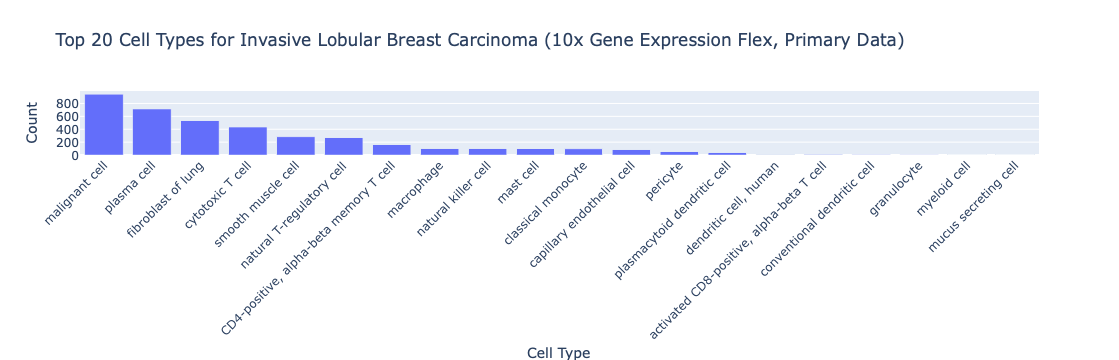

In [17]:


# Calculate cell type distribution
cell_type_distribution = cell_metadata['cell_type'].value_counts()

# Print the distribution (still good to see all counts in the table)
print("\nFull Cell Type Distribution for the specified criteria:")
print(cell_type_distribution)

# --- Fix for Plotting: Select the Top N cell types ---
# You can choose a number for N, for example, the top 20 cell types.
N = 20
top_cell_types = cell_type_distribution.head(N)

# Check if there are any cell types with counts > 0 to plot
if not top_cell_types.empty and top_cell_types.sum() > 0:
    print(f"\nGenerating plot for the top {N} cell types...")
    # Convert the top N Series to a DataFrame for Plotly
    top_cell_types_df = top_cell_types.reset_index()
    top_cell_types_df.columns = ['Cell Type', 'Count']

    fig = px.bar(
        top_cell_types_df,
        x='Cell Type',
        y='Count',
        title=f'Top {N} Cell Types for Invasive Lobular Breast Carcinoma (10x Gene Expression Flex, Primary Data)'
    )
    # Improve readability of x-axis labels by rotating them
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
else:
    print("\nNo significant cell types found matching the criteria to plot.")

